In [2]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# Reading the Data file
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [4]:
# Features and Target Extraction
sentences = df['review'].values
y = df['label'].values

In [5]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [6]:
# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [7]:
# Label Encoding the Target ,Splitting the data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [8]:
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [9]:
# Model Implementation
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 6s 19ms/step - loss: 0.9160 - acc: 0.4976 - val_loss: 0.8449 - val_acc: 0.5098
Epoch 2/5
293/293 [==============================] - 5s 18ms/step - loss: 0.7890 - acc: 0.5806 - val_loss: 0.8395 - val_acc: 0.5173
Epoch 3/5
293/293 [==============================] - 5s 18ms/step - loss: 0.6872 - acc: 0.6791 - val_loss: 0.8781 - val_acc: 0.5187
Epoch 4/5
293/293 [==============================] - 5s 17ms/step - loss: 0.5081 - acc: 0.8141 - val_loss: 0.9410 - val_acc: 0.5053
Epoch 5/5
293/293 [==============================] - 5s 17ms/step - loss: 0.2992 - acc: 0.9288 - val_loss: 1.0663 - val_acc: 0.5075


In [10]:
# Model Evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

782/782 [==============================] - 2s 2ms/step - loss: 1.0663 - acc: 0.5075
Evaluation result on Test Data : Loss = 1.0663437843322754, accuracy = 0.5074800252914429


In [11]:
# Loss and Accuracy Curve
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


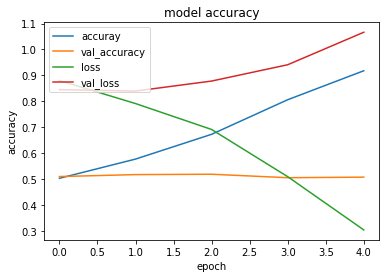

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [13]:
# Adding Embedding Layer
# Pre processing for Embedding Layer

from keras.preprocessing.sequence import pad_sequences
pureSentences = df['review'].values
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [14]:
# Model implementation adding Embedding Layer
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Model Evaluation
[test_loss1, test_acc1] = m.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

Epoch 1/5
293/293 [==============================] - 389s 1s/step - loss: 1.2641 - acc: 0.4672 - val_loss: 0.8624 - val_acc: 0.5039
Epoch 2/5
293/293 [==============================] - 390s 1s/step - loss: 0.7865 - acc: 0.5859 - val_loss: 0.8761 - val_acc: 0.4945
Epoch 3/5
293/293 [==============================] - 393s 1s/step - loss: 0.6176 - acc: 0.7213 - val_loss: 1.0118 - val_acc: 0.4862
Epoch 4/5
293/293 [==============================] - 397s 1s/step - loss: 0.4362 - acc: 0.8275 - val_loss: 1.2117 - val_acc: 0.4832
Epoch 5/5
782/782 [==============================] - 48s 61ms/step - loss: 1.5440 - acc: 0.4851
Evaluation result on Test Data : Loss = 1.5439563989639282, accuracy = 0.4851199984550476


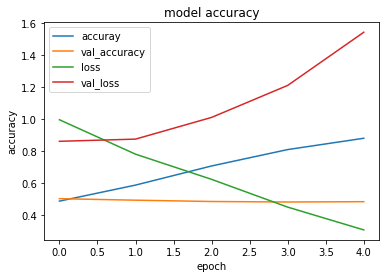

In [15]:
# Loss and Accuracy Curve after adding Embedding Layer
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [16]:
pred = m.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)

Actual Prediction 2 Predicted Prediction [2]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
